In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
input_node=2
hidden_node=4
output_node=1
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0,1,1,0]]).T

In [3]:
net=[]

def sigmoid(x):
   y=np.exp(-1*x)+1
   y=1/y
   #print(y)
   return y
def sigmoid_deriv(x):
    return x*(1-x)
def add_node(name,prev_layer_nodes):
    val=np.ones((1),np.float64)
    weight=2*np.random.random((prev_layer_nodes))-1
    delta=np.ones((1),np.float64)
    ret=[name,val,weight,delta]
    return ret

net.append([add_node('input',0) for i in range(input_node)])
net.append([add_node('hid_one',input_node) for i in range(hidden_node)])
net.append([add_node('output',hidden_node) for i in range(output_node)])
def show_net(net,n):
    for layer in net:
        for nodes in layer:
               print((nodes))

In [4]:
def for_prop(net,input):
    for layer in net:
        i=0
        temp=[]
        for node in layer:
            if node[0]=='input':
                node[1]=input[i]
                prev_val=input
                i=i+1
                #print(prev_val)
            else:
                weight=node[2]
                delta=node[3]
                val=0
                for l in range(len(weight)):
                    val+=prev_val[l]*weight[l]
                val=sigmoid(val)
                node[1]=val
                temp.append(val)
        if(len(temp)!=0):
            prev_val=np.asarray(temp)
    return net,val    
    
    
                

In [5]:
def update_weights(net):
    for layer in net:
        for node in layer:
            if node[0]!='layer1':
                index=net.index(layer)
                weight=node[2]
                delta=node[3]
                Prev_Layer=net[index-1]
                
                for w in range(len(weight)):
                    Prev_val=Prev_Layer[w][1]
                    weight[w]+=np.asarray(0.05*delta*Prev_val)
    Prev_layer=net[index-1]
    return net


            
                

In [6]:
def back_prop(net,expected):
    for l in reversed(range(len(net))):
        layer=net[l]
        temp1=[]
        temp2=[]
        error=[]
        i=0
        for node in layer:
            if node[0]=='input':
                break
                #print(prev_val)
            if node[0]=='output':
                error=expected-node[1]
                err=error
            else:
                de=0
                #print(node[0])
                #print('d',next_delta,'w',next_weight,i,next_weight[0,i])
                for d in next_delta:
                  de+=d*next_weight[0,i]
                error=de
                i=i+1    
            deriv=sigmoid_deriv(node[1])
            delta=np.asarray(error)*deriv
            node[3]=delta
            temp1.append(delta)
            temp2.append(node[2])
        next_delta=np.asarray(temp1)
        next_weight=np.asarray(temp2)
        #next_weight=transpose(next_weight)
    return net,err

In [11]:
_epock=np.zeros((5000),np.int32)
_error=np.zeros((5000),np.float64)
_val=np.zeros((5000),np.float64)
for epock in range(5000):
    for i in range(len(X)):
         #show_net(net,1)
        
        net,val=for_prop(net,X[i])
        #show_net(net,1)
        net,err=back_prop(net,y[i])
        #show_net(net,1)
        net=update_weights(net)
        print(epock,err)
        
    _epock[epock-1]=epock
    _error[epock-1]=err
    _val[epock-1]=val
_epock[epock]=epock
_error[epock]=err
_val[epock]=val

0 [-0.10106598]
0 [0.09841353]
0 [0.11068217]
0 [-0.09863295]
1 [-0.10105831]
1 [0.09840627]
1 [0.11067446]
1 [-0.09862687]
2 [-0.10105065]
2 [0.09839901]
2 [0.11066675]
2 [-0.09862079]
3 [-0.10104298]
3 [0.09839175]
3 [0.11065905]
3 [-0.09861472]
4 [-0.10103531]
4 [0.0983845]
4 [0.11065134]
4 [-0.09860864]
5 [-0.10102765]
5 [0.09837724]
5 [0.11064363]
5 [-0.09860257]
6 [-0.10101999]
6 [0.09836999]
6 [0.11063593]
6 [-0.0985965]
7 [-0.10101232]
7 [0.09836273]
7 [0.11062822]
7 [-0.09859043]
8 [-0.10100466]
8 [0.09835548]
8 [0.11062052]
8 [-0.09858436]
9 [-0.10099701]
9 [0.09834823]
9 [0.11061282]
9 [-0.09857829]
10 [-0.10098935]
10 [0.09834098]
10 [0.11060512]
10 [-0.09857222]
11 [-0.10098169]
11 [0.09833373]
11 [0.11059742]
11 [-0.09856615]
12 [-0.10097403]
12 [0.09832648]
12 [0.11058973]
12 [-0.09856009]
13 [-0.10096638]
13 [0.09831924]
13 [0.11058203]
13 [-0.09855402]
14 [-0.10095873]
14 [0.09831199]
14 [0.11057434]
14 [-0.09854796]
15 [-0.10095107]
15 [0.09830475]
15 [0.11056664]
15 

128 [0.10970522]
128 [-0.09786334]
129 [-0.10008652]
129 [0.09748645]
129 [0.10969767]
129 [-0.09785739]
130 [-0.100079]
130 [0.09747933]
130 [0.10969012]
130 [-0.09785144]
131 [-0.10007149]
131 [0.09747222]
131 [0.10968256]
131 [-0.0978455]
132 [-0.10006397]
132 [0.09746511]
132 [0.10967501]
132 [-0.09783955]
133 [-0.10005646]
133 [0.097458]
133 [0.10966747]
133 [-0.09783361]
134 [-0.10004895]
134 [0.0974509]
134 [0.10965992]
134 [-0.09782767]
135 [-0.10004144]
135 [0.09744379]
135 [0.10965237]
135 [-0.09782173]
136 [-0.10003393]
136 [0.09743668]
136 [0.10964483]
136 [-0.09781579]
137 [-0.10002642]
137 [0.09742958]
137 [0.10963728]
137 [-0.09780985]
138 [-0.10001892]
138 [0.09742247]
138 [0.10962974]
138 [-0.09780391]
139 [-0.10001141]
139 [0.09741537]
139 [0.1096222]
139 [-0.09779797]
140 [-0.10000391]
140 [0.09740827]
140 [0.10961466]
140 [-0.09779203]
141 [-0.0999964]
141 [0.09740117]
141 [0.10960712]
141 [-0.0977861]
142 [-0.0999889]
142 [0.09739407]
142 [0.10959958]
142 [-0.09778

247 [0.09665486]
247 [0.1088147]
247 [-0.09716249]
248 [-0.09920019]
248 [0.09664788]
248 [0.10880729]
248 [-0.09715666]
249 [-0.09919281]
249 [0.0966409]
249 [0.10879988]
249 [-0.09715083]
250 [-0.09918543]
250 [0.09663392]
250 [0.10879247]
250 [-0.097145]
251 [-0.09917805]
251 [0.09662694]
251 [0.10878506]
251 [-0.09713917]
252 [-0.09917068]
252 [0.09661996]
252 [0.10877765]
252 [-0.09713334]
253 [-0.0991633]
253 [0.09661299]
253 [0.10877024]
253 [-0.09712751]
254 [-0.09915593]
254 [0.09660601]
254 [0.10876284]
254 [-0.09712169]
255 [-0.09914855]
255 [0.09659904]
255 [0.10875543]
255 [-0.09711586]
256 [-0.09914118]
256 [0.09659207]
256 [0.10874803]
256 [-0.09711004]
257 [-0.09913381]
257 [0.09658509]
257 [0.10874063]
257 [-0.09710422]
258 [-0.09912644]
258 [0.09657812]
258 [0.10873323]
258 [-0.0970984]
259 [-0.09911907]
259 [0.09657115]
259 [0.10872583]
259 [-0.09709258]
260 [-0.09911171]
260 [0.09656418]
260 [0.10871843]
260 [-0.09708676]
261 [-0.09910434]
261 [0.09655722]
261 [0.10

374 [0.10788252]
374 [-0.09642949]
375 [-0.09827193]
375 [0.09576999]
375 [0.10787525]
375 [-0.09642378]
376 [-0.09826469]
376 [0.09576314]
376 [0.10786799]
376 [-0.09641806]
377 [-0.09825745]
377 [0.0957563]
377 [0.10786072]
377 [-0.09641235]
378 [-0.09825022]
378 [0.09574946]
378 [0.10785346]
378 [-0.09640665]
379 [-0.09824298]
379 [0.09574262]
379 [0.10784619]
379 [-0.09640094]
380 [-0.09823575]
380 [0.09573578]
380 [0.10783893]
380 [-0.09639523]
381 [-0.09822852]
381 [0.09572894]
381 [0.10783167]
381 [-0.09638952]
382 [-0.09822128]
382 [0.0957221]
382 [0.10782441]
382 [-0.09638382]
383 [-0.09821405]
383 [0.09571526]
383 [0.10781715]
383 [-0.09637811]
384 [-0.09820682]
384 [0.09570843]
384 [0.1078099]
384 [-0.09637241]
385 [-0.0981996]
385 [0.09570159]
385 [0.10780264]
385 [-0.09636671]
386 [-0.09819237]
386 [0.09569476]
386 [0.10779539]
386 [-0.09636101]
387 [-0.09818514]
387 [0.09568792]
387 [0.10778813]
387 [-0.09635531]
388 [-0.09817792]
388 [0.09568109]
388 [0.10778088]
388 [-0

502 [0.10696136]
502 [-0.09570576]
503 [-0.09735426]
503 [0.09490241]
503 [0.10695423]
503 [-0.09570016]
504 [-0.09734716]
504 [0.0948957]
504 [0.10694711]
504 [-0.09569456]
505 [-0.09734006]
505 [0.09488899]
505 [0.10693999]
505 [-0.09568897]
506 [-0.09733297]
506 [0.09488228]
506 [0.10693286]
506 [-0.09568338]
507 [-0.09732587]
507 [0.09487557]
507 [0.10692574]
507 [-0.09567778]
508 [-0.09731877]
508 [0.09486887]
508 [0.10691862]
508 [-0.09567219]
509 [-0.09731168]
509 [0.09486216]
509 [0.1069115]
509 [-0.0956666]
510 [-0.09730458]
510 [0.09485546]
510 [0.10690438]
510 [-0.09566101]
511 [-0.09729749]
511 [0.09484875]
511 [0.10689727]
511 [-0.09565542]
512 [-0.0972904]
512 [0.09484205]
512 [0.10689015]
512 [-0.09564983]
513 [-0.09728331]
513 [0.09483535]
513 [0.10688304]
513 [-0.09564425]
514 [-0.09727622]
514 [0.09482865]
514 [0.10687592]
514 [-0.09563866]
515 [-0.09726913]
515 [0.09482195]
515 [0.10686881]
515 [-0.09563307]
516 [-0.09726205]
516 [0.09481525]
516 [0.1068617]
516 [-0.

634 [-0.09643313]
634 [0.09403183]
634 [0.10603005]
634 [-0.0949746]
635 [-0.09642617]
635 [0.09402525]
635 [0.10602306]
635 [-0.09496912]
636 [-0.09641921]
636 [0.09401867]
636 [0.10601608]
636 [-0.09496364]
637 [-0.09641225]
637 [0.0940121]
637 [0.1060091]
637 [-0.09495816]
638 [-0.09640529]
638 [0.09400552]
638 [0.10600211]
638 [-0.09495268]
639 [-0.09639833]
639 [0.09399894]
639 [0.10599513]
639 [-0.0949472]
640 [-0.09639137]
640 [0.09399237]
640 [0.10598815]
640 [-0.09494172]
641 [-0.09638441]
641 [0.0939858]
641 [0.10598118]
641 [-0.09493624]
642 [-0.09637746]
642 [0.09397922]
642 [0.1059742]
642 [-0.09493077]
643 [-0.0963705]
643 [0.09397265]
643 [0.10596722]
643 [-0.09492529]
644 [-0.09636355]
644 [0.09396608]
644 [0.10596025]
644 [-0.09491982]
645 [-0.0963566]
645 [0.09395951]
645 [0.10595327]
645 [-0.09491435]
646 [-0.09634965]
646 [0.09395294]
646 [0.1059463]
646 [-0.09490887]
647 [-0.0963427]
647 [0.09394637]
647 [0.10593933]
647 [-0.0949034]
648 [-0.09633575]
648 [0.093939

761 [-0.09428513]
762 [-0.0955502]
762 [0.09319757]
762 [0.1051444]
762 [-0.09427975]
763 [-0.09554337]
763 [0.09319111]
763 [0.10513755]
763 [-0.09427438]
764 [-0.09553654]
764 [0.09318466]
764 [0.10513069]
764 [-0.094269]
765 [-0.09552971]
765 [0.0931782]
765 [0.10512384]
765 [-0.09426363]
766 [-0.09552288]
766 [0.09317175]
766 [0.10511699]
766 [-0.09425826]
767 [-0.09551605]
767 [0.0931653]
767 [0.10511014]
767 [-0.09425289]
768 [-0.09550922]
768 [0.09315885]
768 [0.1051033]
768 [-0.09424752]
769 [-0.09550239]
769 [0.0931524]
769 [0.10509645]
769 [-0.09424215]
770 [-0.09549557]
770 [0.09314595]
770 [0.1050896]
770 [-0.09423678]
771 [-0.09548874]
771 [0.0931395]
771 [0.10508276]
771 [-0.09423141]
772 [-0.09548192]
772 [0.09313306]
772 [0.10507591]
772 [-0.09422604]
773 [-0.0954751]
773 [0.09312661]
773 [0.10506907]
773 [-0.09422067]
774 [-0.09546828]
774 [0.09312016]
774 [0.10506223]
774 [-0.09421531]
775 [-0.09546146]
775 [0.09311372]
775 [0.10505539]
775 [-0.09420994]
776 [-0.09545

884 [0.10431571]
884 [-0.09362996]
885 [-0.09471723]
885 [0.09241065]
885 [0.10430898]
885 [-0.09362468]
886 [-0.09471051]
886 [0.09240431]
886 [0.10430225]
886 [-0.0936194]
887 [-0.0947038]
887 [0.09239798]
887 [0.10429552]
887 [-0.09361413]
888 [-0.09469709]
888 [0.09239164]
888 [0.10428879]
888 [-0.09360885]
889 [-0.09469039]
889 [0.0923853]
889 [0.10428206]
889 [-0.09360358]
890 [-0.09468368]
890 [0.09237897]
890 [0.10427534]
890 [-0.0935983]
891 [-0.09467697]
891 [0.09237263]
891 [0.10426861]
891 [-0.09359303]
892 [-0.09467027]
892 [0.0923663]
892 [0.10426189]
892 [-0.09358776]
893 [-0.09466356]
893 [0.09235996]
893 [0.10425516]
893 [-0.09358249]
894 [-0.09465686]
894 [0.09235363]
894 [0.10424844]
894 [-0.09357722]
895 [-0.09465016]
895 [0.0923473]
895 [0.10424172]
895 [-0.09357195]
896 [-0.09464346]
896 [0.09234097]
896 [0.104235]
896 [-0.09356668]
897 [-0.09463675]
897 [0.09233464]
897 [0.10422828]
897 [-0.09356141]
898 [-0.09463006]
898 [0.09232831]
898 [0.10422156]
898 [-0.093

1010 [-0.0938858]
1010 [0.09162532]
1010 [0.10347516]
1010 [-0.09297116]
1011 [-0.0938792]
1011 [0.09161909]
1011 [0.10346855]
1011 [-0.09296598]
1012 [-0.09387261]
1012 [0.09161287]
1012 [0.10346194]
1012 [-0.0929608]
1013 [-0.09386602]
1013 [0.09160664]
1013 [0.10345533]
1013 [-0.09295562]
1014 [-0.09385944]
1014 [0.09160042]
1014 [0.10344872]
1014 [-0.09295045]
1015 [-0.09385285]
1015 [0.0915942]
1015 [0.10344212]
1015 [-0.09294527]
1016 [-0.09384626]
1016 [0.09158798]
1016 [0.10343551]
1016 [-0.09294009]
1017 [-0.09383968]
1017 [0.09158176]
1017 [0.10342891]
1017 [-0.09293492]
1018 [-0.09383309]
1018 [0.09157554]
1018 [0.1034223]
1018 [-0.09292974]
1019 [-0.09382651]
1019 [0.09156932]
1019 [0.1034157]
1019 [-0.09292457]
1020 [-0.09381993]
1020 [0.0915631]
1020 [0.1034091]
1020 [-0.0929194]
1021 [-0.09381334]
1021 [0.09155688]
1021 [0.1034025]
1021 [-0.09291422]
1022 [-0.09380676]
1022 [0.09155067]
1022 [0.1033959]
1022 [-0.09290905]
1023 [-0.09380018]
1023 [0.09154445]
1023 [0.1033

1141 [0.1026172]
1141 [-0.09229898]
1142 [-0.09302385]
1142 [0.09081124]
1142 [0.10261071]
1142 [-0.0922939]
1143 [-0.09301739]
1143 [0.09080513]
1143 [0.10260423]
1143 [-0.09228882]
1144 [-0.09301092]
1144 [0.09079902]
1144 [0.10259774]
1144 [-0.09228374]
1145 [-0.09300445]
1145 [0.09079292]
1145 [0.10259126]
1145 [-0.09227866]
1146 [-0.09299799]
1146 [0.09078681]
1146 [0.10258477]
1146 [-0.09227358]
1147 [-0.09299152]
1147 [0.0907807]
1147 [0.10257829]
1147 [-0.0922685]
1148 [-0.09298506]
1148 [0.0907746]
1148 [0.10257181]
1148 [-0.09226342]
1149 [-0.0929786]
1149 [0.0907685]
1149 [0.10256532]
1149 [-0.09225835]
1150 [-0.09297213]
1150 [0.09076239]
1150 [0.10255884]
1150 [-0.09225327]
1151 [-0.09296567]
1151 [0.09075629]
1151 [0.10255236]
1151 [-0.09224819]
1152 [-0.09295921]
1152 [0.09075019]
1152 [0.10254588]
1152 [-0.09224312]
1153 [-0.09295276]
1153 [0.09074409]
1153 [0.10253941]
1153 [-0.09223804]
1154 [-0.0929463]
1154 [0.09073799]
1154 [0.10253293]
1154 [-0.09223297]
1155 [-0.

1264 [0.09007234]
1264 [0.10182596]
1264 [-0.09167926]
1265 [-0.09223511]
1265 [0.09006633]
1265 [0.10181959]
1265 [-0.09167427]
1266 [-0.09222875]
1266 [0.09006033]
1266 [0.10181321]
1266 [-0.09166927]
1267 [-0.0922224]
1267 [0.09005433]
1267 [0.10180684]
1267 [-0.09166428]
1268 [-0.09221604]
1268 [0.09004832]
1268 [0.10180046]
1268 [-0.09165929]
1269 [-0.09220969]
1269 [0.09004232]
1269 [0.10179409]
1269 [-0.0916543]
1270 [-0.09220334]
1270 [0.09003632]
1270 [0.10178771]
1270 [-0.09164931]
1271 [-0.09219698]
1271 [0.09003033]
1271 [0.10178134]
1271 [-0.09164432]
1272 [-0.09219063]
1272 [0.09002433]
1272 [0.10177497]
1272 [-0.09163933]
1273 [-0.09218428]
1273 [0.09001833]
1273 [0.1017686]
1273 [-0.09163434]
1274 [-0.09217793]
1274 [0.09001233]
1274 [0.10176223]
1274 [-0.09162935]
1275 [-0.09217158]
1275 [0.09000634]
1275 [0.10175586]
1275 [-0.09162436]
1276 [-0.09216524]
1276 [0.09000034]
1276 [0.1017495]
1276 [-0.09161938]
1277 [-0.09215889]
1277 [0.08999435]
1277 [0.10174313]
1277 [

1389 [0.08932831]
1389 [0.10103562]
1389 [-0.09106036]
1390 [-0.09144741]
1390 [0.08932241]
1390 [0.10102935]
1390 [-0.09105545]
1391 [-0.09144116]
1391 [0.08931651]
1391 [0.10102308]
1391 [-0.09105055]
1392 [-0.09143492]
1392 [0.08931061]
1392 [0.10101682]
1392 [-0.09104564]
1393 [-0.09142867]
1393 [0.08930472]
1393 [0.10101055]
1393 [-0.09104073]
1394 [-0.09142243]
1394 [0.08929882]
1394 [0.10100429]
1394 [-0.09103583]
1395 [-0.09141619]
1395 [0.08929292]
1395 [0.10099802]
1395 [-0.09103092]
1396 [-0.09140994]
1396 [0.08928703]
1396 [0.10099176]
1396 [-0.09102602]
1397 [-0.0914037]
1397 [0.08928113]
1397 [0.1009855]
1397 [-0.09102112]
1398 [-0.09139746]
1398 [0.08927524]
1398 [0.10097924]
1398 [-0.09101621]
1399 [-0.09139122]
1399 [0.08926935]
1399 [0.10097298]
1399 [-0.09101131]
1400 [-0.09138499]
1400 [0.08926346]
1400 [0.10096672]
1400 [-0.09100641]
1401 [-0.09137875]
1401 [0.08925757]
1401 [0.10096046]
1401 [-0.09100151]
1402 [-0.09137251]
1402 [0.08925168]
1402 [0.1009542]
1402 

1515 [0.10025255]
1515 [-0.09044723]
1516 [-0.09066718]
1516 [0.08858551]
1516 [0.10024639]
1516 [-0.09044241]
1517 [-0.09066104]
1517 [0.08857972]
1517 [0.10024023]
1517 [-0.09043758]
1518 [-0.09065491]
1518 [0.08857392]
1518 [0.10023407]
1518 [-0.09043276]
1519 [-0.09064877]
1519 [0.08856812]
1519 [0.10022791]
1519 [-0.09042794]
1520 [-0.09064264]
1520 [0.08856233]
1520 [0.10022176]
1520 [-0.09042312]
1521 [-0.0906365]
1521 [0.08855653]
1521 [0.1002156]
1521 [-0.09041829]
1522 [-0.09063037]
1522 [0.08855074]
1522 [0.10020944]
1522 [-0.09041347]
1523 [-0.09062423]
1523 [0.08854495]
1523 [0.10020329]
1523 [-0.09040866]
1524 [-0.0906181]
1524 [0.08853916]
1524 [0.10019713]
1524 [-0.09040384]
1525 [-0.09061197]
1525 [0.08853337]
1525 [0.10019098]
1525 [-0.09039902]
1526 [-0.09060584]
1526 [0.08852758]
1526 [0.10018482]
1526 [-0.0903942]
1527 [-0.09059971]
1527 [0.08852179]
1527 [0.10017867]
1527 [-0.09038938]
1528 [-0.09059358]
1528 [0.088516]
1528 [0.10017252]
1528 [-0.09038457]
1529 [-

1640 [0.08787266]
1640 [0.09948878]
1640 [-0.08984922]
1641 [-0.08990645]
1641 [0.08786696]
1641 [0.09948272]
1641 [-0.08984447]
1642 [-0.08990042]
1642 [0.08786126]
1642 [0.09947666]
1642 [-0.08983973]
1643 [-0.08989439]
1643 [0.08785557]
1643 [0.09947061]
1643 [-0.08983499]
1644 [-0.08988836]
1644 [0.08784987]
1644 [0.09946455]
1644 [-0.08983024]
1645 [-0.08988233]
1645 [0.08784417]
1645 [0.09945849]
1645 [-0.0898255]
1646 [-0.0898763]
1646 [0.08783847]
1646 [0.09945244]
1646 [-0.08982076]
1647 [-0.08987027]
1647 [0.08783278]
1647 [0.09944639]
1647 [-0.08981602]
1648 [-0.08986424]
1648 [0.08782709]
1648 [0.09944033]
1648 [-0.08981128]
1649 [-0.08985821]
1649 [0.08782139]
1649 [0.09943428]
1649 [-0.08980654]
1650 [-0.08985218]
1650 [0.0878157]
1650 [0.09942823]
1650 [-0.0898018]
1651 [-0.08984616]
1651 [0.08781001]
1651 [0.09942218]
1651 [-0.08979707]
1652 [-0.08984013]
1652 [0.08780431]
1652 [0.09941613]
1652 [-0.08979233]
1653 [-0.08983411]
1653 [0.08779862]
1653 [0.09941008]
1653 [

1765 [-0.08916457]
1765 [0.08716611]
1765 [0.09873764]
1765 [-0.08926105]
1766 [-0.08915864]
1766 [0.08716051]
1766 [0.09873168]
1766 [-0.08925638]
1767 [-0.08915271]
1767 [0.0871549]
1767 [0.09872572]
1767 [-0.08925171]
1768 [-0.08914678]
1768 [0.0871493]
1768 [0.09871976]
1768 [-0.08924705]
1769 [-0.08914085]
1769 [0.0871437]
1769 [0.0987138]
1769 [-0.08924238]
1770 [-0.08913492]
1770 [0.0871381]
1770 [0.09870785]
1770 [-0.08923772]
1771 [-0.08912899]
1771 [0.0871325]
1771 [0.09870189]
1771 [-0.08923306]
1772 [-0.08912306]
1772 [0.0871269]
1772 [0.09869594]
1772 [-0.08922839]
1773 [-0.08911714]
1773 [0.0871213]
1773 [0.09868998]
1773 [-0.08922373]
1774 [-0.08911121]
1774 [0.0871157]
1774 [0.09868403]
1774 [-0.08921907]
1775 [-0.08910528]
1775 [0.0871101]
1775 [0.09867808]
1775 [-0.08921441]
1776 [-0.08909936]
1776 [0.0871045]
1776 [0.09867213]
1776 [-0.08920975]
1777 [-0.08909344]
1777 [0.08709891]
1777 [0.09866618]
1777 [-0.08920509]
1778 [-0.08908751]
1778 [0.08709331]
1778 [0.0986

1889 [-0.08868697]
1890 [-0.08842924]
1890 [0.08647132]
1890 [0.09799874]
1890 [-0.08868238]
1891 [-0.0884234]
1891 [0.08646581]
1891 [0.09799288]
1891 [-0.08867779]
1892 [-0.08841757]
1892 [0.0864603]
1892 [0.09798702]
1892 [-0.08867319]
1893 [-0.08841174]
1893 [0.08645479]
1893 [0.09798115]
1893 [-0.0886686]
1894 [-0.08840591]
1894 [0.08644928]
1894 [0.09797529]
1894 [-0.08866401]
1895 [-0.08840008]
1895 [0.08644377]
1895 [0.09796943]
1895 [-0.08865942]
1896 [-0.08839425]
1896 [0.08643826]
1896 [0.09796358]
1896 [-0.08865483]
1897 [-0.08838842]
1897 [0.08643275]
1897 [0.09795772]
1897 [-0.08865025]
1898 [-0.0883826]
1898 [0.08642725]
1898 [0.09795186]
1898 [-0.08864566]
1899 [-0.08837677]
1899 [0.08642174]
1899 [0.097946]
1899 [-0.08864107]
1900 [-0.08837094]
1900 [0.08641623]
1900 [0.09794015]
1900 [-0.08863648]
1901 [-0.08836512]
1901 [0.08641073]
1901 [0.09793429]
1901 [-0.0886319]
1902 [-0.08835929]
1902 [0.08640523]
1902 [0.09792844]
1902 [-0.08862731]
1903 [-0.08835347]
1903 [0

2014 [0.0972775]
2014 [-0.08811739]
2015 [-0.08770617]
2015 [0.08578796]
2015 [0.09727173]
2015 [-0.08811287]
2016 [-0.08770044]
2016 [0.08578254]
2016 [0.09726596]
2016 [-0.08810835]
2017 [-0.0876947]
2017 [0.08577712]
2017 [0.0972602]
2017 [-0.08810383]
2018 [-0.08768897]
2018 [0.0857717]
2018 [0.09725443]
2018 [-0.08809932]
2019 [-0.08768323]
2019 [0.08576628]
2019 [0.09724866]
2019 [-0.0880948]
2020 [-0.0876775]
2020 [0.08576086]
2020 [0.0972429]
2020 [-0.08809028]
2021 [-0.08767177]
2021 [0.08575544]
2021 [0.09723713]
2021 [-0.08808576]
2022 [-0.08766604]
2022 [0.08575002]
2022 [0.09723137]
2022 [-0.08808125]
2023 [-0.08766031]
2023 [0.08574461]
2023 [0.0972256]
2023 [-0.08807673]
2024 [-0.08765458]
2024 [0.08573919]
2024 [0.09721984]
2024 [-0.08807221]
2025 [-0.08764885]
2025 [0.08573378]
2025 [0.09721408]
2025 [-0.0880677]
2026 [-0.08764312]
2026 [0.08572836]
2026 [0.09720831]
2026 [-0.08806319]
2027 [-0.08763739]
2027 [0.08572295]
2027 [0.09720255]
2027 [-0.08805867]
2028 [-0.0

2139 [0.08512106]
2139 [0.09656194]
2139 [-0.08755667]
2140 [-0.08699508]
2140 [0.08511572]
2140 [0.09655627]
2140 [-0.08755222]
2141 [-0.08698943]
2141 [0.08511039]
2141 [0.09655059]
2141 [-0.08754777]
2142 [-0.08698379]
2142 [0.08510505]
2142 [0.09654491]
2142 [-0.08754332]
2143 [-0.08697815]
2143 [0.08509972]
2143 [0.09653923]
2143 [-0.08753887]
2144 [-0.08697251]
2144 [0.08509439]
2144 [0.09653356]
2144 [-0.08753442]
2145 [-0.08696688]
2145 [0.08508906]
2145 [0.09652788]
2145 [-0.08752997]
2146 [-0.08696124]
2146 [0.08508373]
2146 [0.09652221]
2146 [-0.08752552]
2147 [-0.0869556]
2147 [0.0850784]
2147 [0.09651653]
2147 [-0.08752108]
2148 [-0.08694997]
2148 [0.08507307]
2148 [0.09651086]
2148 [-0.08751663]
2149 [-0.08694433]
2149 [0.08506774]
2149 [0.09650519]
2149 [-0.08751218]
2150 [-0.0869387]
2150 [0.08506241]
2150 [0.09649952]
2150 [-0.08750774]
2151 [-0.08693306]
2151 [0.08505709]
2151 [0.09649385]
2151 [-0.08750329]
2152 [-0.08692743]
2152 [0.08505176]
2152 [0.09648818]
2152 

2264 [-0.0863012]
2264 [0.08445955]
2264 [0.0958576]
2264 [-0.08700449]
2265 [-0.08629565]
2265 [0.0844543]
2265 [0.09585201]
2265 [-0.0870001]
2266 [-0.0862901]
2266 [0.08444905]
2266 [0.09584642]
2266 [-0.08699572]
2267 [-0.08628456]
2267 [0.08444381]
2267 [0.09584083]
2267 [-0.08699134]
2268 [-0.08627901]
2268 [0.08443856]
2268 [0.09583524]
2268 [-0.08698695]
2269 [-0.08627346]
2269 [0.08443331]
2269 [0.09582965]
2269 [-0.08698257]
2270 [-0.08626791]
2270 [0.08442807]
2270 [0.09582406]
2270 [-0.08697819]
2271 [-0.08626237]
2271 [0.08442282]
2271 [0.09581848]
2271 [-0.08697381]
2272 [-0.08625682]
2272 [0.08441758]
2272 [0.09581289]
2272 [-0.08696943]
2273 [-0.08625128]
2273 [0.08441233]
2273 [0.09580731]
2273 [-0.08696505]
2274 [-0.08624574]
2274 [0.08440709]
2274 [0.09580172]
2274 [-0.08696067]
2275 [-0.08624019]
2275 [0.08440185]
2275 [0.09579614]
2275 [-0.08695629]
2276 [-0.08623465]
2276 [0.08439661]
2276 [0.09579056]
2276 [-0.08695192]
2277 [-0.08622911]
2277 [0.08439137]
2277 [

2388 [-0.08646488]
2389 [-0.08561308]
2389 [0.08380858]
2389 [0.09516414]
2389 [-0.08646056]
2390 [-0.08560762]
2390 [0.08380342]
2390 [0.09515863]
2390 [-0.08645624]
2391 [-0.08560217]
2391 [0.08379825]
2391 [0.09515313]
2391 [-0.08645192]
2392 [-0.08559671]
2392 [0.08379309]
2392 [0.09514763]
2392 [-0.0864476]
2393 [-0.08559125]
2393 [0.08378792]
2393 [0.09514212]
2393 [-0.08644329]
2394 [-0.08558579]
2394 [0.08378276]
2394 [0.09513662]
2394 [-0.08643897]
2395 [-0.08558034]
2395 [0.0837776]
2395 [0.09513112]
2395 [-0.08643465]
2396 [-0.08557488]
2396 [0.08377244]
2396 [0.09512562]
2396 [-0.08643034]
2397 [-0.08556943]
2397 [0.08376728]
2397 [0.09512012]
2397 [-0.08642602]
2398 [-0.08556397]
2398 [0.08376211]
2398 [0.09511462]
2398 [-0.08642171]
2399 [-0.08555852]
2399 [0.08375695]
2399 [0.09510912]
2399 [-0.08641739]
2400 [-0.08555307]
2400 [0.08375179]
2400 [0.09510362]
2400 [-0.08641308]
2401 [-0.08554761]
2401 [0.08374664]
2401 [0.09509813]
2401 [-0.08640877]
2402 [-0.08554216]
24

2513 [0.09448668]
2513 [-0.08592886]
2514 [-0.08493609]
2514 [0.08316788]
2514 [0.09448126]
2514 [-0.0859246]
2515 [-0.08493072]
2515 [0.08316279]
2515 [0.09447584]
2515 [-0.08592035]
2516 [-0.08492535]
2516 [0.08315771]
2516 [0.09447042]
2516 [-0.08591609]
2517 [-0.08491998]
2517 [0.08315262]
2517 [0.094465]
2517 [-0.08591184]
2518 [-0.08491461]
2518 [0.08314754]
2518 [0.09445958]
2518 [-0.08590758]
2519 [-0.08490924]
2519 [0.08314246]
2519 [0.09445416]
2519 [-0.08590333]
2520 [-0.08490387]
2520 [0.08313738]
2520 [0.09444875]
2520 [-0.08589907]
2521 [-0.08489851]
2521 [0.0831323]
2521 [0.09444333]
2521 [-0.08589482]
2522 [-0.08489314]
2522 [0.08312722]
2522 [0.09443791]
2522 [-0.08589057]
2523 [-0.08488777]
2523 [0.08312214]
2523 [0.0944325]
2523 [-0.08588632]
2524 [-0.08488241]
2524 [0.08311706]
2524 [0.09442708]
2524 [-0.08588206]
2525 [-0.08487704]
2525 [0.08311198]
2525 [0.09442167]
2525 [-0.08587781]
2526 [-0.08487168]
2526 [0.0831069]
2526 [0.09441625]
2526 [-0.08587356]
2527 [-

2638 [0.08254217]
2638 [0.09381402]
2638 [-0.08540055]
2639 [-0.08426997]
2639 [0.08253717]
2639 [0.09380868]
2639 [-0.08539636]
2640 [-0.08426468]
2640 [0.08253216]
2640 [0.09380334]
2640 [-0.08539216]
2641 [-0.0842594]
2641 [0.08252715]
2641 [0.093798]
2641 [-0.08538796]
2642 [-0.08425411]
2642 [0.08252215]
2642 [0.09379266]
2642 [-0.08538377]
2643 [-0.08424883]
2643 [0.08251715]
2643 [0.09378732]
2643 [-0.08537958]
2644 [-0.08424355]
2644 [0.08251214]
2644 [0.09378198]
2644 [-0.08537538]
2645 [-0.08423826]
2645 [0.08250714]
2645 [0.09377665]
2645 [-0.08537119]
2646 [-0.08423298]
2646 [0.08250214]
2646 [0.09377131]
2646 [-0.085367]
2647 [-0.0842277]
2647 [0.08249713]
2647 [0.09376598]
2647 [-0.0853628]
2648 [-0.08422242]
2648 [0.08249213]
2648 [0.09376064]
2648 [-0.08535861]
2649 [-0.08421714]
2649 [0.08248713]
2649 [0.09375531]
2649 [-0.08535442]
2650 [-0.08421186]
2650 [0.08248213]
2650 [0.09374997]
2650 [-0.08535023]
2651 [-0.08420658]
2651 [0.08247713]
2651 [0.09374464]
2651 [-0.

2763 [-0.08361967]
2763 [0.08192112]
2763 [0.09315136]
2763 [-0.08487969]
2764 [-0.08361446]
2764 [0.08191619]
2764 [0.0931461]
2764 [-0.08487556]
2765 [-0.08360926]
2765 [0.08191127]
2765 [0.09314084]
2765 [-0.08487142]
2766 [-0.08360406]
2766 [0.08190634]
2766 [0.09313558]
2766 [-0.08486728]
2767 [-0.08359886]
2767 [0.08190141]
2767 [0.09313032]
2767 [-0.08486315]
2768 [-0.08359366]
2768 [0.08189648]
2768 [0.09312506]
2768 [-0.08485901]
2769 [-0.08358846]
2769 [0.08189155]
2769 [0.0931198]
2769 [-0.08485488]
2770 [-0.08358326]
2770 [0.08188663]
2770 [0.09311455]
2770 [-0.08485074]
2771 [-0.08357806]
2771 [0.0818817]
2771 [0.09310929]
2771 [-0.08484661]
2772 [-0.08357287]
2772 [0.08187678]
2772 [0.09310403]
2772 [-0.08484247]
2773 [-0.08356767]
2773 [0.08187185]
2773 [0.09309878]
2773 [-0.08483834]
2774 [-0.08356248]
2774 [0.08186693]
2774 [0.09309352]
2774 [-0.08483421]
2775 [-0.08355728]
2775 [0.08186201]
2775 [0.09308827]
2775 [-0.08483007]
2776 [-0.08355209]
2776 [0.08185708]
2776

2876 [-0.08441505]
2877 [-0.08303082]
2877 [0.08136302]
2877 [0.09255552]
2877 [-0.08441096]
2878 [-0.0830257]
2878 [0.08135815]
2878 [0.09255033]
2878 [-0.08440688]
2879 [-0.08302057]
2879 [0.08135329]
2879 [0.09254514]
2879 [-0.08440279]
2880 [-0.08301544]
2880 [0.08134843]
2880 [0.09253995]
2880 [-0.08439871]
2881 [-0.08301032]
2881 [0.08134357]
2881 [0.09253476]
2881 [-0.08439462]
2882 [-0.08300519]
2882 [0.08133872]
2882 [0.09252957]
2882 [-0.08439054]
2883 [-0.08300007]
2883 [0.08133386]
2883 [0.09252438]
2883 [-0.08438645]
2884 [-0.08299494]
2884 [0.081329]
2884 [0.09251919]
2884 [-0.08438237]
2885 [-0.08298982]
2885 [0.08132414]
2885 [0.09251401]
2885 [-0.08437829]
2886 [-0.0829847]
2886 [0.08131929]
2886 [0.09250882]
2886 [-0.08437421]
2887 [-0.08297958]
2887 [0.08131443]
2887 [0.09250364]
2887 [-0.08437012]
2888 [-0.08297446]
2888 [0.08130957]
2888 [0.09249845]
2888 [-0.08436604]
2889 [-0.08296934]
2889 [0.08130472]
2889 [0.09249327]
2889 [-0.08436196]
2890 [-0.08296422]
2890

2991 [-0.08394805]
2992 [-0.08244538]
2992 [0.08080784]
2992 [0.09196246]
2992 [-0.08394401]
2993 [-0.08244033]
2993 [0.08080304]
2993 [0.09195734]
2993 [-0.08393998]
2994 [-0.08243528]
2994 [0.08079825]
2994 [0.09195222]
2994 [-0.08393594]
2995 [-0.08243022]
2995 [0.08079346]
2995 [0.0919471]
2995 [-0.08393191]
2996 [-0.08242517]
2996 [0.08078866]
2996 [0.09194198]
2996 [-0.08392787]
2997 [-0.08242012]
2997 [0.08078387]
2997 [0.09193686]
2997 [-0.08392384]
2998 [-0.08241507]
2998 [0.08077908]
2998 [0.09193174]
2998 [-0.08391981]
2999 [-0.08241002]
2999 [0.08077429]
2999 [0.09192662]
2999 [-0.08391577]
3000 [-0.08240497]
3000 [0.0807695]
3000 [0.0919215]
3000 [-0.08391174]
3001 [-0.08239992]
3001 [0.08076471]
3001 [0.09191638]
3001 [-0.08390771]
3002 [-0.08239488]
3002 [0.08075992]
3002 [0.09191127]
3002 [-0.08390368]
3003 [-0.08238983]
3003 [0.08075514]
3003 [0.09190615]
3003 [-0.08389965]
3004 [-0.08238478]
3004 [0.08075035]
3004 [0.09190103]
3004 [-0.08389562]
3005 [-0.08237974]
300

3124 [-0.0834151]
3125 [-0.08177881]
3125 [0.08017532]
3125 [0.09128635]
3125 [-0.08341112]
3126 [-0.08177384]
3126 [0.08017061]
3126 [0.09128131]
3126 [-0.08340714]
3127 [-0.08176887]
3127 [0.08016589]
3127 [0.09127626]
3127 [-0.08340316]
3128 [-0.0817639]
3128 [0.08016117]
3128 [0.09127122]
3128 [-0.08339919]
3129 [-0.08175893]
3129 [0.08015646]
3129 [0.09126618]
3129 [-0.08339521]
3130 [-0.08175397]
3130 [0.08015174]
3130 [0.09126113]
3130 [-0.08339123]
3131 [-0.081749]
3131 [0.08014703]
3131 [0.09125609]
3131 [-0.08338726]
3132 [-0.08174403]
3132 [0.08014231]
3132 [0.09125105]
3132 [-0.08338328]
3133 [-0.08173907]
3133 [0.0801376]
3133 [0.09124601]
3133 [-0.08337931]
3134 [-0.0817341]
3134 [0.08013289]
3134 [0.09124097]
3134 [-0.08337533]
3135 [-0.08172914]
3135 [0.08012817]
3135 [0.09123593]
3135 [-0.08337136]
3136 [-0.08172418]
3136 [0.08012346]
3136 [0.09123089]
3136 [-0.08336738]
3137 [-0.08171921]
3137 [0.08011875]
3137 [0.09122586]
3137 [-0.08336341]
3138 [-0.08171425]
3138 [

3247 [-0.08292884]
3248 [-0.08117216]
3248 [0.07959929]
3248 [0.09067017]
3248 [-0.08292491]
3249 [-0.08116727]
3249 [0.07959464]
3249 [0.09066519]
3249 [-0.08292098]
3250 [-0.08116238]
3250 [0.07958999]
3250 [0.09066022]
3250 [-0.08291705]
3251 [-0.08115748]
3251 [0.07958534]
3251 [0.09065525]
3251 [-0.08291313]
3252 [-0.08115259]
3252 [0.07958069]
3252 [0.09065027]
3252 [-0.0829092]
3253 [-0.0811477]
3253 [0.07957605]
3253 [0.0906453]
3253 [-0.08290528]
3254 [-0.08114281]
3254 [0.0795714]
3254 [0.09064033]
3254 [-0.08290135]
3255 [-0.08113792]
3255 [0.07956676]
3255 [0.09063536]
3255 [-0.08289743]
3256 [-0.08113303]
3256 [0.07956211]
3256 [0.09063039]
3256 [-0.0828935]
3257 [-0.08112814]
3257 [0.07955747]
3257 [0.09062542]
3257 [-0.08288958]
3258 [-0.08112325]
3258 [0.07955282]
3258 [0.09062045]
3258 [-0.08288565]
3259 [-0.08111836]
3259 [0.07954818]
3259 [0.09061548]
3259 [-0.08288173]
3260 [-0.08111348]
3260 [0.07954354]
3260 [0.09061051]
3260 [-0.08287781]
3261 [-0.08110859]
3261 

3384 [0.07897209]
3384 [0.08999876]
3384 [-0.08239446]
3385 [-0.08050732]
3385 [0.07896752]
3385 [0.08999386]
3385 [-0.08239059]
3386 [-0.0805025]
3386 [0.07896295]
3386 [0.08998896]
3386 [-0.08238672]
3387 [-0.08049769]
3387 [0.07895837]
3387 [0.08998407]
3387 [-0.08238284]
3388 [-0.08049288]
3388 [0.0789538]
3388 [0.08997917]
3388 [-0.08237897]
3389 [-0.08048807]
3389 [0.07894923]
3389 [0.08997427]
3389 [-0.0823751]
3390 [-0.08048326]
3390 [0.07894465]
3390 [0.08996938]
3390 [-0.08237123]
3391 [-0.08047846]
3391 [0.07894008]
3391 [0.08996448]
3391 [-0.08236736]
3392 [-0.08047365]
3392 [0.07893551]
3392 [0.08995958]
3392 [-0.08236349]
3393 [-0.08046884]
3393 [0.07893094]
3393 [0.08995469]
3393 [-0.08235962]
3394 [-0.08046403]
3394 [0.07892637]
3394 [0.0899498]
3394 [-0.08235575]
3395 [-0.08045923]
3395 [0.0789218]
3395 [0.0899449]
3395 [-0.08235188]
3396 [-0.08045442]
3396 [0.07891724]
3396 [0.08994001]
3396 [-0.08234801]
3397 [-0.08044962]
3397 [0.07891267]
3397 [0.08993512]
3397 [-0

3503 [-0.07994364]
3503 [0.07843148]
3503 [0.08941959]
3503 [-0.08193629]
3504 [-0.0799389]
3504 [0.07842697]
3504 [0.08941476]
3504 [-0.08193246]
3505 [-0.07993416]
3505 [0.07842246]
3505 [0.08940992]
3505 [-0.08192864]
3506 [-0.07992942]
3506 [0.07841795]
3506 [0.08940509]
3506 [-0.08192481]
3507 [-0.07992468]
3507 [0.07841344]
3507 [0.08940026]
3507 [-0.08192098]
3508 [-0.07991994]
3508 [0.07840893]
3508 [0.08939542]
3508 [-0.08191716]
3509 [-0.0799152]
3509 [0.07840442]
3509 [0.08939059]
3509 [-0.08191333]
3510 [-0.07991046]
3510 [0.07839992]
3510 [0.08938576]
3510 [-0.08190951]
3511 [-0.07990572]
3511 [0.07839541]
3511 [0.08938093]
3511 [-0.08190568]
3512 [-0.07990098]
3512 [0.0783909]
3512 [0.0893761]
3512 [-0.08190186]
3513 [-0.07989625]
3513 [0.0783864]
3513 [0.08937127]
3513 [-0.08189804]
3514 [-0.07989151]
3514 [0.07838189]
3514 [0.08936644]
3514 [-0.08189421]
3515 [-0.07988678]
3515 [0.07837738]
3515 [0.08936161]
3515 [-0.08189039]
3516 [-0.07988204]
3516 [0.07837288]
3516 [

3631 [0.08880506]
3631 [-0.08144949]
3632 [-0.07933671]
3632 [0.07785387]
3632 [0.08880029]
3632 [-0.08144571]
3633 [-0.07933204]
3633 [0.07784942]
3633 [0.08879553]
3633 [-0.08144193]
3634 [-0.07932738]
3634 [0.07784498]
3634 [0.08879076]
3634 [-0.08143815]
3635 [-0.07932271]
3635 [0.07784054]
3635 [0.088786]
3635 [-0.08143438]
3636 [-0.07931804]
3636 [0.07783609]
3636 [0.08878123]
3636 [-0.0814306]
3637 [-0.07931338]
3637 [0.07783165]
3637 [0.08877647]
3637 [-0.08142682]
3638 [-0.07930871]
3638 [0.07782721]
3638 [0.0887717]
3638 [-0.08142304]
3639 [-0.07930405]
3639 [0.07782277]
3639 [0.08876694]
3639 [-0.08141927]
3640 [-0.07929939]
3640 [0.07781833]
3640 [0.08876217]
3640 [-0.08141549]
3641 [-0.07929472]
3641 [0.07781389]
3641 [0.08875741]
3641 [-0.08141172]
3642 [-0.07929006]
3642 [0.07780945]
3642 [0.08875265]
3642 [-0.08140794]
3643 [-0.0792854]
3643 [0.07780501]
3643 [0.08874789]
3643 [-0.08140417]
3644 [-0.07928074]
3644 [0.07780057]
3644 [0.08874313]
3644 [-0.08140039]
3645 [

3745 [0.08826494]
3745 [-0.08102104]
3746 [-0.07880827]
3746 [0.07735055]
3746 [0.08826023]
3746 [-0.0810173]
3747 [-0.07880367]
3747 [0.07734616]
3747 [0.08825552]
3747 [-0.08101356]
3748 [-0.07879907]
3748 [0.07734178]
3748 [0.08825081]
3748 [-0.08100983]
3749 [-0.07879447]
3749 [0.07733739]
3749 [0.08824611]
3749 [-0.08100609]
3750 [-0.07878987]
3750 [0.07733301]
3750 [0.0882414]
3750 [-0.08100235]
3751 [-0.07878526]
3751 [0.07732863]
3751 [0.08823669]
3751 [-0.08099862]
3752 [-0.07878066]
3752 [0.07732424]
3752 [0.08823199]
3752 [-0.08099488]
3753 [-0.07877606]
3753 [0.07731986]
3753 [0.08822728]
3753 [-0.08099115]
3754 [-0.07877147]
3754 [0.07731548]
3754 [0.08822258]
3754 [-0.08098741]
3755 [-0.07876687]
3755 [0.0773111]
3755 [0.08821787]
3755 [-0.08098368]
3756 [-0.07876227]
3756 [0.07730671]
3756 [0.08821317]
3756 [-0.08097994]
3757 [-0.07875767]
3757 [0.07730233]
3757 [0.08820847]
3757 [-0.08097621]
3758 [-0.07875307]
3758 [0.07729795]
3758 [0.08820377]
3758 [-0.08097248]
3759

3869 [0.07681484]
3869 [0.08768494]
3869 [-0.0805603]
3870 [-0.07824175]
3870 [0.07681052]
3870 [0.0876803]
3870 [-0.08055661]
3871 [-0.07823722]
3871 [0.07680619]
3871 [0.08767565]
3871 [-0.08055291]
3872 [-0.07823268]
3872 [0.07680187]
3872 [0.08767101]
3872 [-0.08054922]
3873 [-0.07822815]
3873 [0.07679755]
3873 [0.08766636]
3873 [-0.08054553]
3874 [-0.07822362]
3874 [0.07679323]
3874 [0.08766172]
3874 [-0.08054184]
3875 [-0.07821908]
3875 [0.0767889]
3875 [0.08765708]
3875 [-0.08053815]
3876 [-0.07821455]
3876 [0.07678458]
3876 [0.08765243]
3876 [-0.08053445]
3877 [-0.07821002]
3877 [0.07678026]
3877 [0.08764779]
3877 [-0.08053076]
3878 [-0.07820549]
3878 [0.07677594]
3878 [0.08764315]
3878 [-0.08052707]
3879 [-0.07820096]
3879 [0.07677162]
3879 [0.08763851]
3879 [-0.08052338]
3880 [-0.07819643]
3880 [0.0767673]
3880 [0.08763387]
3880 [-0.08051969]
3881 [-0.0781919]
3881 [0.07676298]
3881 [0.08762922]
3881 [-0.080516]
3882 [-0.07818738]
3882 [0.07675866]
3882 [0.08762458]
3882 [-0.

4008 [0.08704388]
4008 [-0.08005021]
4009 [-0.07761673]
4009 [0.07621417]
4009 [0.0870393]
4009 [-0.08004656]
4010 [-0.07761227]
4010 [0.07620991]
4010 [0.08703472]
4010 [-0.08004291]
4011 [-0.07760781]
4011 [0.07620566]
4011 [0.08703014]
4011 [-0.08003927]
4012 [-0.07760336]
4012 [0.0762014]
4012 [0.08702557]
4012 [-0.08003562]
4013 [-0.0775989]
4013 [0.07619714]
4013 [0.08702099]
4013 [-0.08003198]
4014 [-0.07759444]
4014 [0.07619289]
4014 [0.08701642]
4014 [-0.08002834]
4015 [-0.07758999]
4015 [0.07618864]
4015 [0.08701184]
4015 [-0.08002469]
4016 [-0.07758553]
4016 [0.07618438]
4016 [0.08700727]
4016 [-0.08002105]
4017 [-0.07758108]
4017 [0.07618013]
4017 [0.08700269]
4017 [-0.08001741]
4018 [-0.07757662]
4018 [0.07617588]
4018 [0.08699812]
4018 [-0.08001376]
4019 [-0.07757217]
4019 [0.07617163]
4019 [0.08699355]
4019 [-0.08001012]
4020 [-0.07756771]
4020 [0.07616737]
4020 [0.08698898]
4020 [-0.08000648]
4021 [-0.07756326]
4021 [0.07616312]
4021 [0.0869844]
4021 [-0.08000284]
4022 

4128 [-0.07961509]
4129 [-0.0770855]
4129 [0.07570682]
4129 [0.08649346]
4129 [-0.07961149]
4130 [-0.07708111]
4130 [0.07570262]
4130 [0.08648894]
4130 [-0.07960788]
4131 [-0.07707671]
4131 [0.07569842]
4131 [0.08648442]
4131 [-0.07960428]
4132 [-0.07707232]
4132 [0.07569422]
4132 [0.0864799]
4132 [-0.07960067]
4133 [-0.07706793]
4133 [0.07569003]
4133 [0.08647538]
4133 [-0.07959707]
4134 [-0.07706353]
4134 [0.07568583]
4134 [0.08647086]
4134 [-0.07959346]
4135 [-0.07705914]
4135 [0.07568163]
4135 [0.08646634]
4135 [-0.07958986]
4136 [-0.07705475]
4136 [0.07567744]
4136 [0.08646183]
4136 [-0.07958626]
4137 [-0.07705036]
4137 [0.07567324]
4137 [0.08645731]
4137 [-0.07958265]
4138 [-0.07704597]
4138 [0.07566904]
4138 [0.08645279]
4138 [-0.07957905]
4139 [-0.07704158]
4139 [0.07566485]
4139 [0.08644828]
4139 [-0.07957545]
4140 [-0.07703719]
4140 [0.07566066]
4140 [0.08644376]
4140 [-0.07957185]
4141 [-0.0770328]
4141 [0.07565646]
4141 [0.08643925]
4141 [-0.07956824]
4142 [-0.07702841]
414

4244 [-0.07919899]
4245 [-0.0765792]
4245 [0.07522284]
4245 [0.08597229]
4245 [-0.07919542]
4246 [-0.07657487]
4246 [0.07521869]
4246 [0.08596783]
4246 [-0.07919185]
4247 [-0.07657053]
4247 [0.07521455]
4247 [0.08596336]
4247 [-0.07918828]
4248 [-0.0765662]
4248 [0.07521041]
4248 [0.0859589]
4248 [-0.07918472]
4249 [-0.07656187]
4249 [0.07520626]
4249 [0.08595443]
4249 [-0.07918115]
4250 [-0.07655753]
4250 [0.07520212]
4250 [0.08594997]
4250 [-0.07917758]
4251 [-0.0765532]
4251 [0.07519798]
4251 [0.08594551]
4251 [-0.07917402]
4252 [-0.07654887]
4252 [0.07519383]
4252 [0.08594104]
4252 [-0.07917045]
4253 [-0.07654454]
4253 [0.07518969]
4253 [0.08593658]
4253 [-0.07916688]
4254 [-0.07654021]
4254 [0.07518555]
4254 [0.08593212]
4254 [-0.07916332]
4255 [-0.07653588]
4255 [0.07518141]
4255 [0.08592766]
4255 [-0.07915975]
4256 [-0.07653155]
4256 [0.07517727]
4256 [0.0859232]
4256 [-0.07915619]
4257 [-0.07652722]
4257 [0.07517313]
4257 [0.08591874]
4257 [-0.07915262]
4258 [-0.0765229]
4258 [

4384 [-0.07870252]
4385 [-0.07597741]
4385 [0.074647]
4385 [0.0853516]
4385 [-0.07869899]
4386 [-0.07597315]
4386 [0.07464292]
4386 [0.0853472]
4386 [-0.07869547]
4387 [-0.07596889]
4387 [0.07463884]
4387 [0.0853428]
4387 [-0.07869195]
4388 [-0.07596463]
4388 [0.07463476]
4388 [0.0853384]
4388 [-0.07868842]
4389 [-0.07596036]
4389 [0.07463068]
4389 [0.085334]
4389 [-0.0786849]
4390 [-0.0759561]
4390 [0.0746266]
4390 [0.0853296]
4390 [-0.07868138]
4391 [-0.07595184]
4391 [0.07462252]
4391 [0.0853252]
4391 [-0.07867786]
4392 [-0.07594758]
4392 [0.07461844]
4392 [0.0853208]
4392 [-0.07867433]
4393 [-0.07594333]
4393 [0.07461436]
4393 [0.0853164]
4393 [-0.07867081]
4394 [-0.07593907]
4394 [0.07461029]
4394 [0.08531201]
4394 [-0.07866729]
4395 [-0.07593481]
4395 [0.07460621]
4395 [0.08530761]
4395 [-0.07866377]
4396 [-0.07593055]
4396 [0.07460213]
4396 [0.08530321]
4396 [-0.07866025]
4397 [-0.07592629]
4397 [0.07459806]
4397 [0.08529882]
4397 [-0.07865673]
4398 [-0.07592204]
4398 [0.0745939

4496 [-0.07830973]
4497 [-0.07550314]
4497 [0.07419271]
4497 [0.08486144]
4497 [-0.07830624]
4498 [-0.07549893]
4498 [0.07418868]
4498 [0.08485709]
4498 [-0.07830275]
4499 [-0.07549473]
4499 [0.07418465]
4499 [0.08485274]
4499 [-0.07829926]
4500 [-0.07549052]
4500 [0.07418062]
4500 [0.08484839]
4500 [-0.07829578]
4501 [-0.07548632]
4501 [0.07417659]
4501 [0.08484404]
4501 [-0.07829229]
4502 [-0.07548211]
4502 [0.07417256]
4502 [0.08483969]
4502 [-0.0782888]
4503 [-0.07547791]
4503 [0.07416853]
4503 [0.08483534]
4503 [-0.07828531]
4504 [-0.07547371]
4504 [0.0741645]
4504 [0.08483099]
4504 [-0.07828182]
4505 [-0.0754695]
4505 [0.07416048]
4505 [0.08482664]
4505 [-0.07827834]
4506 [-0.0754653]
4506 [0.07415645]
4506 [0.0848223]
4506 [-0.07827485]
4507 [-0.0754611]
4507 [0.07415242]
4507 [0.08481795]
4507 [-0.07827136]
4508 [-0.0754569]
4508 [0.0741484]
4508 [0.0848136]
4508 [-0.07826788]
4509 [-0.0754527]
4509 [0.07414437]
4509 [0.08480926]
4509 [-0.07826439]
4510 [-0.0754485]
4510 [0.074

4621 [-0.07498534]
4621 [0.07369623]
4621 [0.08432524]
4621 [-0.07787584]
4622 [-0.07498119]
4622 [0.07369226]
4622 [0.08432095]
4622 [-0.07787239]
4623 [-0.07497705]
4623 [0.07368828]
4623 [0.08431665]
4623 [-0.07786894]
4624 [-0.0749729]
4624 [0.0736843]
4624 [0.08431236]
4624 [-0.07786548]
4625 [-0.07496876]
4625 [0.07368033]
4625 [0.08430806]
4625 [-0.07786203]
4626 [-0.07496462]
4626 [0.07367635]
4626 [0.08430376]
4626 [-0.07785858]
4627 [-0.07496047]
4627 [0.07367238]
4627 [0.08429947]
4627 [-0.07785513]
4628 [-0.07495633]
4628 [0.07366841]
4628 [0.08429518]
4628 [-0.07785168]
4629 [-0.07495219]
4629 [0.07366443]
4629 [0.08429088]
4629 [-0.07784823]
4630 [-0.07494805]
4630 [0.07366046]
4630 [0.08428659]
4630 [-0.07784478]
4631 [-0.07494391]
4631 [0.07365649]
4631 [0.0842823]
4631 [-0.07784133]
4632 [-0.07493977]
4632 [0.07365252]
4632 [0.084278]
4632 [-0.07783788]
4633 [-0.07493563]
4633 [0.07364854]
4633 [0.08427371]
4633 [-0.07783443]
4634 [-0.07493149]
4634 [0.07364457]
4634 [

4747 [-0.07446688]
4747 [0.07319859]
4747 [0.08378723]
4747 [-0.07744314]
4748 [-0.07446279]
4748 [0.07319467]
4748 [0.08378299]
4748 [-0.07743973]
4749 [-0.07445871]
4749 [0.07319075]
4749 [0.08377875]
4749 [-0.07743631]
4750 [-0.07445463]
4750 [0.07318683]
4750 [0.0837745]
4750 [-0.0774329]
4751 [-0.07445054]
4751 [0.0731829]
4751 [0.08377026]
4751 [-0.07742948]
4752 [-0.07444646]
4752 [0.07317898]
4752 [0.08376602]
4752 [-0.07742607]
4753 [-0.07444238]
4753 [0.07317506]
4753 [0.08376178]
4753 [-0.07742265]
4754 [-0.0744383]
4754 [0.07317114]
4754 [0.08375754]
4754 [-0.07741924]
4755 [-0.07443422]
4755 [0.07316723]
4755 [0.0837533]
4755 [-0.07741583]
4756 [-0.07443014]
4756 [0.07316331]
4756 [0.08374906]
4756 [-0.07741241]
4757 [-0.07442606]
4757 [0.07315939]
4757 [0.08374482]
4757 [-0.077409]
4758 [-0.07442198]
4758 [0.07315547]
4758 [0.08374058]
4758 [-0.07740559]
4759 [-0.0744179]
4759 [0.07315155]
4759 [0.08373635]
4759 [-0.07740217]
4760 [-0.07441382]
4760 [0.07314763]
4760 [0.0

4881 [-0.07698798]
4882 [-0.07391983]
4882 [0.07267291]
4882 [0.08321826]
4882 [-0.0769846]
4883 [-0.07391581]
4883 [0.07266904]
4883 [0.08321408]
4883 [-0.07698122]
4884 [-0.07391179]
4884 [0.07266517]
4884 [0.08320989]
4884 [-0.07697785]
4885 [-0.07390777]
4885 [0.07266131]
4885 [0.0832057]
4885 [-0.07697447]
4886 [-0.07390376]
4886 [0.07265745]
4886 [0.08320152]
4886 [-0.07697109]
4887 [-0.07389974]
4887 [0.07265358]
4887 [0.08319734]
4887 [-0.07696772]
4888 [-0.07389572]
4888 [0.07264972]
4888 [0.08319315]
4888 [-0.07696434]
4889 [-0.0738917]
4889 [0.07264586]
4889 [0.08318897]
4889 [-0.07696097]
4890 [-0.07388769]
4890 [0.07264199]
4890 [0.08318478]
4890 [-0.07695759]
4891 [-0.07388367]
4891 [0.07263813]
4891 [0.0831806]
4891 [-0.07695421]
4892 [-0.07387965]
4892 [0.07263427]
4892 [0.08317642]
4892 [-0.07695084]
4893 [-0.07387564]
4893 [0.07263041]
4893 [0.08317224]
4893 [-0.07694746]
4894 [-0.07387162]
4894 [0.07262655]
4894 [0.08316806]
4894 [-0.07694409]
4895 [-0.07386761]
4895

4993 [0.07224638]
4993 [0.08275612]
4993 [-0.0766114]
4994 [-0.0734725]
4994 [0.07224256]
4994 [0.08275197]
4994 [-0.07660806]
4995 [-0.07346853]
4995 [0.07223874]
4995 [0.08274783]
4995 [-0.07660471]
4996 [-0.07346456]
4996 [0.07223492]
4996 [0.08274369]
4996 [-0.07660136]
4997 [-0.0734606]
4997 [0.0722311]
4997 [0.08273956]
4997 [-0.07659802]
4998 [-0.07345663]
4998 [0.07222728]
4998 [0.08273542]
4998 [-0.07659467]
4999 [-0.07345266]
4999 [0.07222346]
4999 [0.08273128]
4999 [-0.07659133]


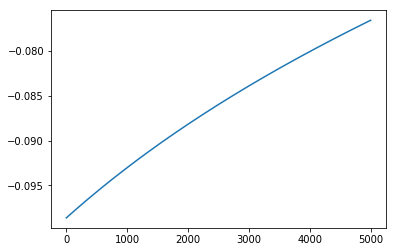

0.07654787959456354


In [12]:
net,val=for_prop(net,[1,1])
#from matplotlib import pyplot as plt
plt.plot(_epock,_error)
plt.show()
print(val)

In [11]:
a=np.ones((2,2),np.int8)
np.shape(a)

(2, 2)